In [1]:
# original folder contains: README, Codes, good_bad_carton_images folder with subfolders for INTERNAL images 
# step 1: webscrape using for loop
# step 2: remove duplicates, remove corrupted, use YOLOv3 object detection transfer learning to remove irrelevant images
# step 3: do a manual scan of scraped images to check that they fit the label, i.e. are they good or bad? even if we scrape for good boxes, sometimes may get bad boxes, hence we need to manually check
# step 4: add internal images to scraped images

In [1]:
# webscraping
import os
from bs4 import BeautifulSoup
import requests
import urllib.request

# removing corrupted images
from PIL import Image

# removing duplicates
import hashlib
from hashlib import md5
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# EDA
import seaborn as sns

# Webscraping

In [1]:
# setting up working directory to store images from webscraping

cwd=os.getcwd()
#print(cwd)
if 'good_bad_carton_images' not in cwd:
    os.chdir(cwd+'\\good_bad_carton_images')
cwd=os.getcwd() #update cwd
#print(cwd) #to double check working directory

# creating folders to store scraped images
subfolders = ['webscraped_bad','webscraped_good']
for subfolder in subfolders:
    if subfolder not in os.listdir(cwd):
        os.mkdir(cwd+'\\'+folder)

In [16]:
# setting up for webscraping using Beautiful Soup library

headers = {
    'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36 Edg/94.0.992.50"
}

In [20]:
# urls chosen based on first-cut examination of images' relevance

urls_to_scrape = [] # create empty list to store all urls to be scraped for good product box images
urls_to_scrape_2 = [] # create empty list to store all urls to be scraped for bad product box images

# GOOD images
# istockphoto
x = 'https://www.istockphoto.com/search/2/image?page=3&phrase=cardboard%20box' # base url structure
ind = x.find('page=') + len('page=') # find index position in url to change page number by performing for loop
for i in range(1,8): # range of pages determined via manual examination for relevancy
    y = x[:ind] + str(i) + x[(ind+1):]
    urls_to_scrape.append(y)
    
x = 'https://www.istockphoto.com/search/2/image?mediatype=photography&page=1&phrase=isolated%20shipping%20carton'
ind = x.find('page=') + len('page=')
for i in range(1,6):
    y = x[:ind] + str(i) + x[(ind+1):]
    urls_to_scrape.append(y)
    
# freepik
x = 'https://www.freepik.com/search?dates=any&demographic=any-people&format=search&page=1&query=cardboard%20box&selection=1&sort=popular&type=photo'
ind = x.find('page=') + len('page=')
for i in range(1,5):
    y = x[:ind] + str(i) + x[(ind+1):]
    urls_to_scrape.append(y)

x = 'https://www.freepik.com/search?dates=any&demographic=any-people&format=search&page=1&query=shipping%20carton&selection=1&sort=popular&type=photo'
ind = x.find('page=') + len('page=')
for i in range(1,6):
    y = x[:ind] + str(i) + x[(ind+1):]
    urls_to_scrape.append(y)
    
# depositphotos
x = 'https://depositphotos.com/similar-images/10180258.html?offset=100'
ind = x.find('offset=') + len('offset=')
for i in range(6):
    y = x[:ind] + str(i) + x[(ind+1):]
    urls_to_scrape.append(y)
    
# shutterstock
x = 'https://www.shutterstock.com/search/isolated+carton+box?image_type=photo&page=2'
ind = x.find('page=') + len('page=')
for i in range(1,4):
    y = x[:ind] + str(i) + x[(ind+1):]
    urls_to_scrape.append(y)

# BAD images
# istockphoto
x = 'https://www.istockphoto.com/search/more-like-this/1201162965?assettype=image&mediatype=photography&phrase=damaged%20shipping%20box&page=2' # base url structure
ind = x.find('page=') + len('page=') # find index position in url to change page number by performing for loop
for i in range(1,4): # range of pages determined via manual examination for relevancy
    y = x[:ind] + str(i) + x[(ind+1):]
    urls_to_scrape_2.append(y)

# deposit photos
x = 'https://depositphotos.com/similar-images/8186707.html?'
urls_to_scrape_2.append(x) # other page not relevant

# dreams time
x = 'https://www.dreamstime.com/photos-images/damaged-cardboard-box.html?pg=2'
ind = x.find('pg=') + len('pg=')
for i in range(1,6): 
    y = x[:ind] + str(i) + x[(ind+1):]
    urls_to_scrape_2.append(y)

# shutter stock
x = 'https://www.shutterstock.com/search/damaged+cardboard+box?image_type=photo&page=2'
ind = x.find('page=') + len('page=')
for i in range(1,8): 
    y = x[:ind] + str(i) + x[(ind+1):]
    urls_to_scrape_2.append(y)
    
print('URLs to scrape for good carton box images:')
for url in urls_to_scrape:
    print(url)

print('\nURLs to scrape for bad carton box images:')
for url in urls_to_scrape_2:
    print(url)

URLs to scrape for good carton box images:
https://www.istockphoto.com/search/2/image?page=1&phrase=cardboard%20box
https://www.istockphoto.com/search/2/image?page=2&phrase=cardboard%20box
https://www.istockphoto.com/search/2/image?page=3&phrase=cardboard%20box
https://www.istockphoto.com/search/2/image?page=4&phrase=cardboard%20box
https://www.istockphoto.com/search/2/image?page=5&phrase=cardboard%20box
https://www.istockphoto.com/search/2/image?page=6&phrase=cardboard%20box
https://www.istockphoto.com/search/2/image?page=7&phrase=cardboard%20box
https://www.istockphoto.com/search/2/image?mediatype=photography&page=1&phrase=isolated%20shipping%20carton
https://www.istockphoto.com/search/2/image?mediatype=photography&page=2&phrase=isolated%20shipping%20carton
https://www.istockphoto.com/search/2/image?mediatype=photography&page=3&phrase=isolated%20shipping%20carton
https://www.istockphoto.com/search/2/image?mediatype=photography&page=4&phrase=isolated%20shipping%20carton
https://www.is

In [33]:
# webscraping for GOOD images first

Images=[] #create empty list to store the good box image source links

#compiling and storing the good box images' source links
for url in urls_to_scrape:
    source = requests.get(url, headers = headers).text
    soup = BeautifulSoup(source, 'lxml')
    
    if 'istock' in url:
        img_links=soup.select('img[src^="https://media.istockphoto.com/photos"]')
        for i in range(len(img_links)):
            Images.append(img_links[i]['src'])
    elif 'freepik' in url:
        img_links=soup.select('img[data-src^="https://img.freepik.com/free-photo"]')
        for i in range(len(img_links)):
            Images.append(img_links[i]['data-src'])
    elif 'deposit' in url:
        img_links=soup.select('img[src^="https://st"]')
        for i in range(len(img_links)):
            Images.append(img_links[i]['src'])
    elif 'shutter' in url:
        img_links=soup.select('img[src^="https://image.shutterstock.com"]')
        for i in range(len(img_links)):
            Images.append(img_links[i]['src'])
#print(Images) to check for errors

In [34]:
#download scraped GOOD images to subfolder
for j in range(len(Images)):
    name=cwd+'\webscraped_good\good.'+str(j)+'.jpg'
    urllib.request.urlretrieve(Images[j], name)

In [25]:
#webscrape for BAD images

Images_2=[] #create empty list to store the bad box image source links

#compiling and storing the good box images' source links
for url in urls_to_scrape_2:
    source = requests.get(url, headers = headers).text
    soup = BeautifulSoup(source, 'lxml')
    
    if 'istock' in url:
        img_links=soup.select('img[src^="https://media.istockphoto.com/photos"]')
        for i in range(len(img_links)):
            Images_2.append(img_links[i]['src'])
    elif 'dreams' in url:
        img_links=soup.select('img[data-src^="https://thumbs.dreamstime.com"]')
        for i in range(len(img_links)):
            Images_2.append(img_links[i]['data-src'])
    elif 'deposit' in url:
        img_links=soup.select('img[src^="https://st"]')
        for i in range(len(img_links)):
            Images_2.append(img_links[i]['src'])
    elif 'shutter' in url:
        img_links=soup.select('img[src^="https://image.shutterstock.com/image-photo"]')
        for i in range(len(img_links)):
            Images_2.append(img_links[i]['src'])
    #print(img_links)
# print(Images_2)

In [28]:
# download scraped BAD images to subfolder
for k in range(len(Images_2)):
    name=cwd+'\webscraped_bad\\bad.'+str(k)+'.jpg'
    urllib.request.urlretrieve(Images_2[k], name)

# EDA

In [3]:
# check the distribution of images between internal vs scraped, good vs bad
os.chdir('C:\\Users\\LeeX\\Desktop\\Proof_Of_Concept\\good_bad_carton_images')
cwd = os.getcwd()

count_list=[]
folder_list = os.listdir() # list out subfolders in Proof_Of_Concept\\good_bad_carton_images

for folder in folder_list: # loop through each folder 
    os.chdir(folder) # change directory to each subfolder
    num_images = len(os.listdir()) # count length of each subfolder, i.e. how many images it contains
    count_list.append(num_images)
    os.chdir(cwd)

os.chdir(cwd) # change back current working directory to cwd

print(folder_list)
print(count_list)

['internal_bad', 'internal_good', 'webscraped_bad', 'webscraped_good']
[1086, 295, 262, 605]


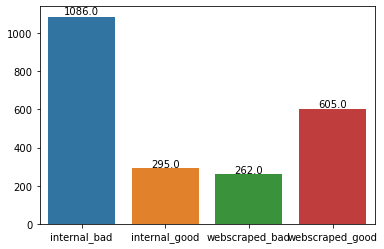

In [104]:
# show barplot of distribution of images
def show_values(axs, orient="v", space=.01): # function to show data labels in bar plot
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
        
ax = sns.barplot(x=folder_list, y=count_list)
show_values(ax)

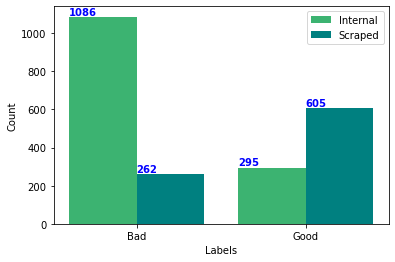

In [6]:
# create data
x = np.arange(2)
internal_y = count_list[:2]
scraped_y = count_list[2:4]
width = 0.4
  
# plot grouped bar plot, grouped by class label
plt.bar(x-0.2, internal_y, width, color='mediumseagreen')
plt.bar(x+0.2, scraped_y, width, color='teal')
plt.xticks(x, ['Bad', 'Good'])
plt.xlabel("Labels")
plt.ylabel("Count")
plt.legend(["Internal", "Scraped"])

reorder_count_list=[]
for i in range(2):
    for j in [internal_y, scraped_y]:
        reorder_count_list.append(j[i])
for i in range(len(reorder_count_list)):
    y = reorder_count_list[i]
    x = -.4 + i*.4
    if i > 1:
        x += .2
    plt.text(x, y+10, str(y), color='blue', fontweight='bold')

os.chdir('C:\\Users\\LeeX\\Desktop\\Proof_Of_Concept')
plt.savefig('class_barplot.png')
plt.show()

From the barplots above, it is evident that there is class imbalance, as the split between good and bad is : __xx/xx__. We will balance out the classes using SMOTE subsequently after we clean the data.